In [1]:
pwd

'/home/samuel'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import tqdm
pd.set_option("display.max.columns",None)

In [3]:
client_train = pd.read_csv("~/Documents/Books/DataScience/Datasets/Zindi Competitions/Fraud detection/train/client_train.csv")
invoice_train = pd.read_csv("~/Documents/Books/DataScience/Datasets/Zindi Competitions/Fraud detection/train/invoice_train.csv")
client_test = pd.read_csv("~/Documents/Books/DataScience/Datasets/Zindi Competitions/Fraud detection/test/client_test.csv")
invoice_test = pd.read_csv("~/Documents/Books/DataScience/Datasets/Zindi Competitions/Fraud detection/test/invoice_test.csv")
sub = pd.read_csv("~/Documents/Books/DataScience/Datasets/Zindi Competitions/Fraud detection/SampleSubmission.csv")
client_train.head()

/home/samuel/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


## Exploratory Data Analysis

In [4]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [5]:
client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [6]:
invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [7]:
sub.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [8]:
invoice_train.isnull().any()

client_id               False
invoice_date            False
tarif_type              False
counter_number          False
counter_statue          False
counter_code            False
reading_remarque        False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
consommation_level_4    False
old_index               False
new_index               False
months_number           False
counter_type            False
dtype: bool

In [9]:
invoice_test.isnull().any()

client_id               False
invoice_date            False
tarif_type              False
counter_number          False
counter_statue          False
counter_code            False
reading_remarque        False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
consommation_level_4    False
old_index               False
new_index               False
months_number           False
counter_type            False
dtype: bool

In [10]:
invoice_test.dtypes

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue           int64
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

In [12]:
import seaborn as sns
def outlier_check(data):
    plt.figure(figsize=(16,8))
    plt.xlim(data.min(), data.max())
    sns.boxplot(data)

In [13]:
import datetime
for z in [client_train, client_test]:
    z['creation_date'] = pd.to_datetime(z['creation_date'])
    z['year'] =  z['creation_date'].dt.year
    z['month'] = z['creation_date'].dt.month
    z['dayofweek'] = z['creation_date'].dt.dayofweek

In [14]:
for q in [invoice_train, invoice_test]:
    q['invoice_date'] = pd.to_datetime(q['invoice_date'])
    q['year'] = q['invoice_date'].dt.year
    q['month'] = q['invoice_date'].dt.month
    q['dayofweek'] = q['invoice_date'].dt.dayofweek

In [15]:
dd = invoice_train.dtypes == 'object'
dd

client_id                True
invoice_date            False
tarif_type              False
counter_number          False
counter_statue           True
counter_code            False
reading_remarque        False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
consommation_level_4    False
old_index               False
new_index               False
months_number           False
counter_type             True
year                    False
month                   False
dayofweek               False
dtype: bool

In [16]:
invoice_train.counter_statue.unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

In [17]:
invoice_train.loc[invoice_train['counter_statue'] == 'A']

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month,dayofweek
1923231,train_Client_30467,2011-11-07,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2011,11,0
1923237,train_Client_30467,2007-04-17,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2007,4,1
1923240,train_Client_30467,2005-11-08,15,9505424,A,202,6,1,0,0,0,0,3922,3922,4,ELEC,2005,11,1
1923241,train_Client_30467,2006-11-12,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2006,11,6
1923242,train_Client_30467,2012-10-07,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2012,10,6
1923247,train_Client_30467,2012-03-13,15,9505424,A,202,6,1,0,0,0,0,3972,3972,8,ELEC,2012,3,1
1923251,train_Client_30467,2006-04-18,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2006,4,1
1923267,train_Client_30467,2006-08-14,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2006,8,0
1923270,train_Client_30467,2012-11-13,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2012,11,1
1923271,train_Client_30467,2007-11-12,15,9505424,A,202,6,1,0,0,0,0,3972,3972,8,ELEC,2007,11,0


In [18]:
tu = invoice_train.loc[invoice_train['client_id'] == 'train_Client_30467']
tu

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month,dayofweek
1923228,train_Client_30467,2015-10-11,15,9505424,0,202,6,1,0,0,0,0,3972,3972,2,ELEC,2015,10,6
1923229,train_Client_30467,2015-10-11,10,3968865,0,202,8,1,104,0,0,0,56450,56554,2,ELEC,2015,10,6
1923230,train_Client_30467,2005-09-12,40,12655,0,5,6,1,146,0,0,0,7724,7870,4,GAZ,2005,9,0
1923231,train_Client_30467,2011-11-07,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2011,11,0
1923232,train_Client_30467,2011-11-07,10,3968865,0,202,6,1,200,331,0,0,48564,49095,4,ELEC,2011,11,0
1923233,train_Client_30467,2018-07-03,40,12655,0,5,8,1,0,0,0,0,13679,13679,16,GAZ,2018,7,1
1923234,train_Client_30467,2018-07-03,15,9505424,0,202,6,1,0,0,0,0,3922,3922,16,ELEC,2018,7,1
1923235,train_Client_30467,2007-11-12,10,3968865,0,202,6,1,400,1177,0,0,41696,43273,8,ELEC,2007,11,0
1923236,train_Client_30467,2007-04-17,40,12655,0,5,9,1,733,0,0,0,8851,9584,4,GAZ,2007,4,1
1923237,train_Client_30467,2007-04-17,15,9505424,A,202,6,1,0,0,0,0,3972,3972,4,ELEC,2007,4,1


In [19]:
invoice_test.counter_statue.unique()

array([0, 1, 5, 4, 3, 2])

In [20]:
nn = {'A':0}
invoice_train['counter_statue'] = invoice_train['counter_statue'].replace(nn)
#invoice_test['counter_statue'] = invoice_test['counter_statue'].replace(nn)

In [21]:
tu = invoice_train.loc[invoice_train['client_id'] == 'train_Client_30467']
tu

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month,dayofweek
1923228,train_Client_30467,2015-10-11,15,9505424,0,202,6,1,0,0,0,0,3972,3972,2,ELEC,2015,10,6
1923229,train_Client_30467,2015-10-11,10,3968865,0,202,8,1,104,0,0,0,56450,56554,2,ELEC,2015,10,6
1923230,train_Client_30467,2005-09-12,40,12655,0,5,6,1,146,0,0,0,7724,7870,4,GAZ,2005,9,0
1923231,train_Client_30467,2011-11-07,15,9505424,0,202,6,1,0,0,0,0,3972,3972,4,ELEC,2011,11,0
1923232,train_Client_30467,2011-11-07,10,3968865,0,202,6,1,200,331,0,0,48564,49095,4,ELEC,2011,11,0
1923233,train_Client_30467,2018-07-03,40,12655,0,5,8,1,0,0,0,0,13679,13679,16,GAZ,2018,7,1
1923234,train_Client_30467,2018-07-03,15,9505424,0,202,6,1,0,0,0,0,3922,3922,16,ELEC,2018,7,1
1923235,train_Client_30467,2007-11-12,10,3968865,0,202,6,1,400,1177,0,0,41696,43273,8,ELEC,2007,11,0
1923236,train_Client_30467,2007-04-17,40,12655,0,5,9,1,733,0,0,0,8851,9584,4,GAZ,2007,4,1
1923237,train_Client_30467,2007-04-17,15,9505424,0,202,6,1,0,0,0,0,3972,3972,4,ELEC,2007,4,1


In [21]:
invoice_test['counter_type'].unique()

array(['ELEC', 'GAZ'], dtype=object)

In [22]:
oo = {'ELEC':0,'GAZ':1}
for tt in [invoice_train, invoice_test]:
    tt['counter_type'] = tt['counter_type'].replace(oo)
invoice_train.dtypes

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                     int64
year                             int64
month                            int64
dayofweek                        int64
dtype: object

In [23]:
invoice_train['counter_type'].nunique()

2

In [23]:
tu = invoice_train.loc[invoice_train['client_id'] == 'train_Client_30467']
tu

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month,dayofweek
1923228,train_Client_30467,2015-10-11,15,9505424,0,202,6,1,0,0,0,0,3972,3972,2,0,2015,10,6
1923229,train_Client_30467,2015-10-11,10,3968865,0,202,8,1,104,0,0,0,56450,56554,2,0,2015,10,6
1923230,train_Client_30467,2005-09-12,40,12655,0,5,6,1,146,0,0,0,7724,7870,4,1,2005,9,0
1923231,train_Client_30467,2011-11-07,15,9505424,0,202,6,1,0,0,0,0,3972,3972,4,0,2011,11,0
1923232,train_Client_30467,2011-11-07,10,3968865,0,202,6,1,200,331,0,0,48564,49095,4,0,2011,11,0
1923233,train_Client_30467,2018-07-03,40,12655,0,5,8,1,0,0,0,0,13679,13679,16,1,2018,7,1
1923234,train_Client_30467,2018-07-03,15,9505424,0,202,6,1,0,0,0,0,3922,3922,16,0,2018,7,1
1923235,train_Client_30467,2007-11-12,10,3968865,0,202,6,1,400,1177,0,0,41696,43273,8,0,2007,11,0
1923236,train_Client_30467,2007-04-17,40,12655,0,5,9,1,733,0,0,0,8851,9584,4,1,2007,4,1
1923237,train_Client_30467,2007-04-17,15,9505424,0,202,6,1,0,0,0,0,3972,3972,4,0,2007,4,1


In [26]:
invoice_train['counter_statue'] = invoice_train['counter_statue'].astype(str).astype(int)

In [26]:
invoice_train.dtypes

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                   int64
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                     int64
year                             int64
month                            int64
dayofweek                        int64
dtype: object

In [27]:
invoice_test.dtypes

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                   int64
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                     int64
year                             int64
month                            int64
dayofweek                        int64
dtype: object

In [28]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month,dayofweek
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0,2014,3,0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0,2013,3,4
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0,2015,3,0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,0,2015,7,0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,0,2016,11,3


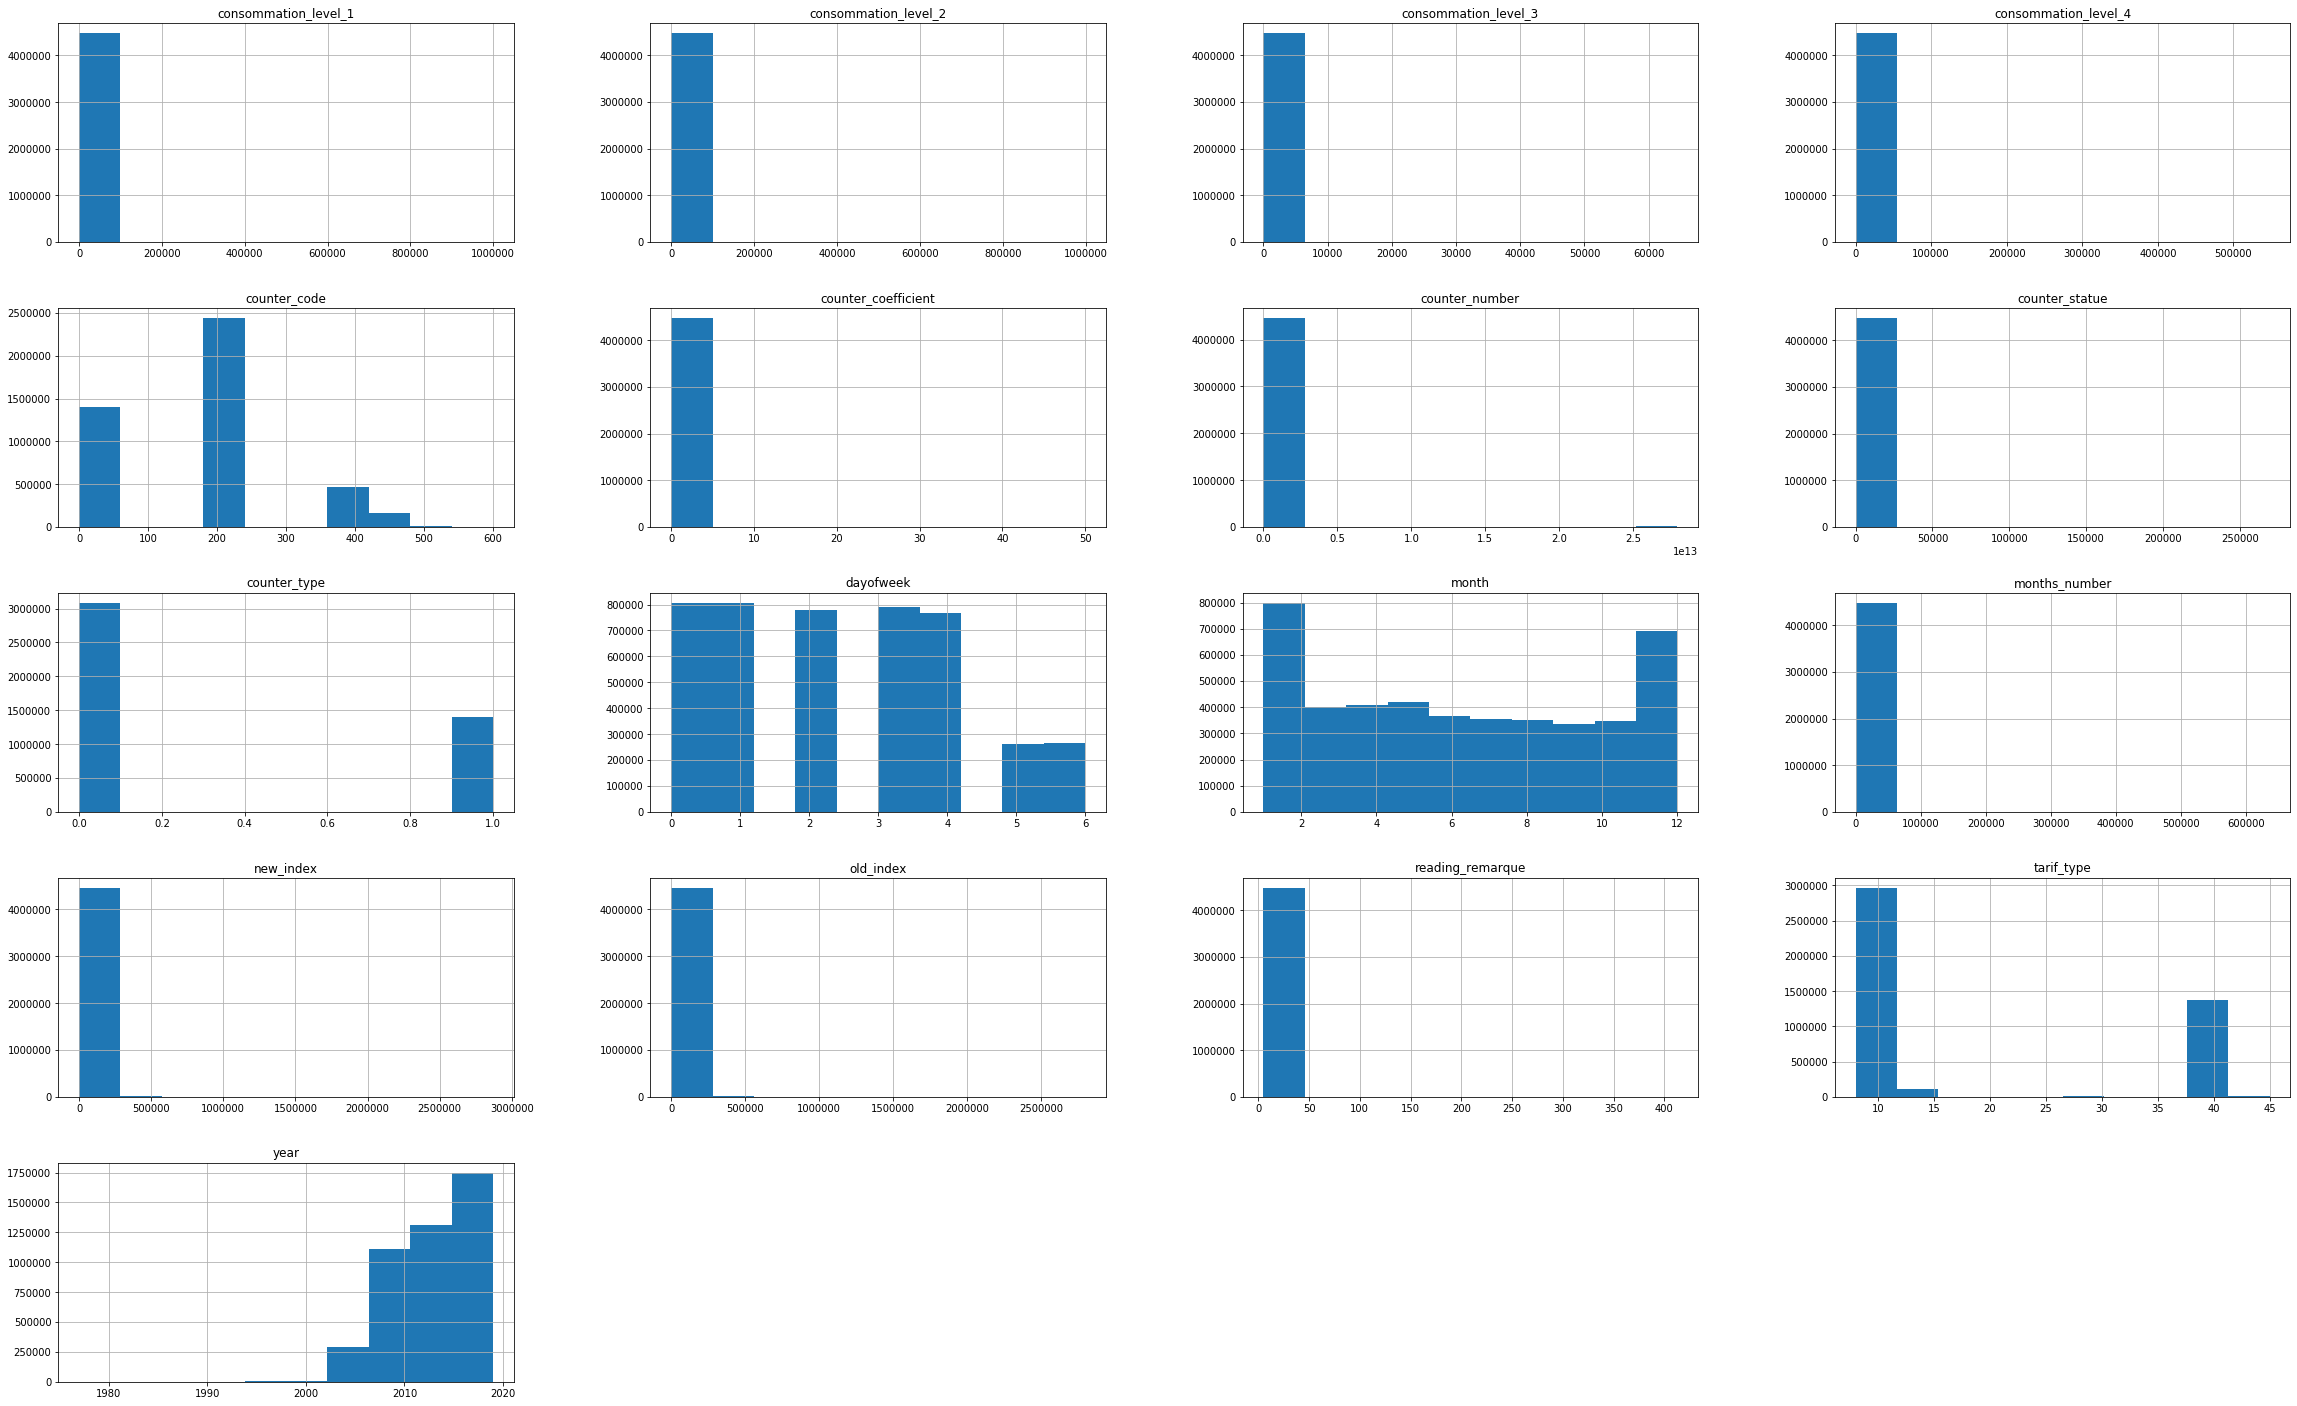

In [29]:
invoice_train.hist(figsize=(40,25))

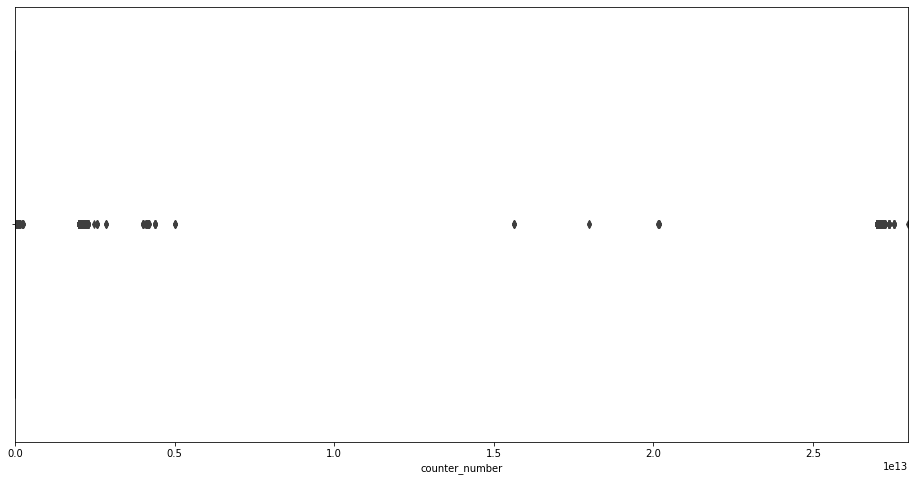

In [30]:
plt.figure(figsize=(16,8))
plt.xlim(invoice_train.counter_number.min(), invoice_train.counter_number.max())
sns.boxplot(invoice_train.counter_number)

In [31]:
invoice_train.counter_number.nunique()

201893

In [24]:
aggs = {}
aggs['consommation_level_1'] = ['sum','max','min','mean']
aggs['consommation_level_2'] = ['sum','max','min','mean']
aggs['consommation_level_3'] = ['sum','max','min','mean']
aggs['consommation_level_4'] = ['sum','max','min','mean']

aggs['month'] = ['mean', 'max', 'min']
aggs['year'] = ['nunique','max','min','mean']
aggs['dayofweek'] = ['max','min','mean']

aggs['months_number'] = ['max','min','mean','sum']
aggs['reading_remarque'] = ['max','min','mean','sum']
aggs['counter_coefficient'] = ['max', 'min','mean','sum']
aggs['counter_number'] = ['nunique','max','min']
aggs['counter_type'] = ['nunique','mean','sum']
aggs['counter_statue'] = ['nunique','max','min','sum']
aggs['tarif_type'] = ['nunique','max','min','sum']
aggs['counter_code'] = ['nunique','max','mean','min']


aggs['old_index'] = ['nunique','mean','max','min']
aggs['new_index'] = ['nunique','mean','max','min']

In [27]:
agg_train = invoice_train.groupby(['client_id']).agg(aggs)
agg_test = invoice_test.groupby(['client_id']).agg(aggs)

In [28]:
agg_train.head()

consommation_level_1                         \
                                   sum   max  min        mean   
client_id                                                       
train_Client_0                   12334  1200   38  352.400000   
train_Client_1                   20629  1207  190  557.540541   
train_Client_10                  14375  2400  188  798.611111   
train_Client_100                    24    15    0    1.200000   
train_Client_1000                 9292   800  124  663.714286   

                  consommation_level_2                       \
                                   sum  max min        mean   
client_id                                                     
train_Client_0                     370  186   0   10.571429   
train_Client_1                       0    0   0    0.000000   
train_Client_10                    682  682   0   37.888889   
train_Client_100                     0    0   0    0.000000   
train_Client_1000                 1468  400   0  104.857143   

                  consommation_level_3                       \
                                   sum  max min        mean   
client_id                                                     
train_Client_0                       0    0   0    0.000000   
train_Client_1                       0    0   0    0.000000   
train_Client_10                      0    0   0    0.000000   
train_Client_100                     0    0   0    0.000000   
train_Client_1000                 1643  800   0  117.357143   

                  consommation_level_4                         month          \
                                   sum  max min       mean      mean max min   
client_id                                                                      
train_Client_0                       0    0   0   0.000000  6.685714  12   1   
train_Client_1                       0    0   0   0.000000  5.135135  10   1   
train_Client_10                      0    0   0   0.000000  6.611111  11   2   
train_Client_100                     0    0   0   0.000000  5.550000  10   1   
train_Client_1000                  514  382   0  36.714286  7.571429  12   2   

                     year                          dayofweek                \
                  nunique   max   min         mean       max min      mean   
client_id                                                                    
train_Client_0         15  2019  2005  2011.142857         6   0  1.771429   
train_Client_1         15  2019  2005  2011.837838         6   0  2.621622   
train_Client_10        12  2019  2005  2010.944444         6   0  2.111111   
train_Client_100        8  2012  2005  2008.600000         6   0  2.400000   
train_Client_1000       5  2019  2015  2016.857143         6   0  3.071429   

                  months_number                    reading_remarque      \
                            max min      mean  sum              max min   
client_id                                                                 
train_Client_0               12   2  4.628571  162                9   6   
train_Client_1                8   2  4.324324  160                9   6   
train_Client_10              12   4  6.444444  116                9   6   
train_Client_100              6   4  4.200000   84                9   6   
train_Client_1000             4   2  3.714286   52                9   8   

                                 counter_coefficient               \
                       mean  sum                 max min mean sum   
client_id                                                           
train_Client_0     6.971429  244                   1   1  1.0  35   
train_Client_1     7.216216  267                   1   1  1.0  37   
train_Client_10    7.055556  127                   1   1  1.0  18   
train_Client_100   6.150000  123                   1   1  1.0  20   
train_Client_1000  8.857143  124                   1   1  1.0  14   

                  counter_number                   counter_type    

In [35]:
agg_train.shape, agg_test.shape, client_train.shape, client_test.shape 

((135493, 64), (58069, 64), (135493, 9), (58069, 8))

In [29]:
agg_train.columns = ['_'.join(col).strip() for col in agg_train.columns.values]
agg_test.columns = ['_'.join(col).strip() for col in agg_test.columns.values]

In [37]:
agg_test.head()

,consommation_level_1_sum,consommation_level_1_max,consommation_level_1_min,consommation_level_1_mean,consommation_level_2_sum,consommation_level_2_max,consommation_level_2_min,consommation_level_2_mean,consommation_level_3_sum,consommation_level_3_max,consommation_level_3_min,consommation_level_3_mean,consommation_level_4_sum,consommation_level_4_max,consommation_level_4_min,consommation_level_4_mean,month_mean,month_max,month_min,year_nunique,year_max,year_min,year_mean,dayofweek_max,dayofweek_min,dayofweek_mean,months_number_max,months_number_min,months_number_mean,months_number_sum,reading_remarque_max,reading_remarque_min,reading_remarque_mean,reading_remarque_sum,counter_coefficient_max,counter_coefficient_min,counter_coefficient_mean,counter_coefficient_sum,counter_number_nunique,counter_number_max,counter_number_min,counter_type_nunique,counter_type_mean,counter_type_sum,counter_statue_nunique,counter_statue_max,counter_statue_min,counter_statue_sum,tarif_type_nunique,tarif_type_max,tarif_type_min,tarif_type_sum,counter_code_nunique,counter_code_max,counter_code_mean,counter_code_min,old_index_nunique,old_index_mean,old_index_max,old_index_min,new_index_nunique,new_index_mean,new_index_max,new_index_min
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
test_Client_0,18061,1090,0,488.135135,120,120,0,3.243243,0,0,0,0.000000,0,0,0,0.000000,6.837838,12,3,15,2019,2005,2011.648649,5,0,1.945946,8,2,4.378378,162,9,6,6.810811,252,1,1,1.0,37,1,651208,651208,1,0.000000,0,1,0,0,0,1,11,11,407,1,203,203.000000,203,36,11389.837838,21348,3057,36,11881.216216,21677,3383
test_Client_1,24011,3600,11,1091.409091,18549,4053,0,843.136364,4011,1144,0,182.318182,12899,12899,0,586.318182,6.181818,10,1,11,2019,2009,2014.136364,6,0,2.545455,12,2,4.545455,100,9,6,7.636364,168,1,1,1.0,22,1,174760,174760,1,0.000000,0,2,1,0,1,1,11,11,242,1,433,433.000000,433,22,29380.772727,55213,7,22,32083.954545,57083,800
test_Client_10,40999,1200,0,554.040541,2765,400,0,37.364865,1165,800,0,15.743243,12,12,0,0.162162,7.986486,12,4,15,2019,2005,2012.891892,4,0,1.783784,4,4,4.000000,296,9,6,7.459459,552,1,1,1.0,74,2,6970199,799814,2,0.432432,32,1,0,0,0,2,40,11,1742,2,207,119.648649,5,74,11774.054054,37461,0,73,12381.364865,39026,41
test_Client_100,9774,721,0,244.350000,0,0,0,0.000000,0,0,0,0.000000,0,0,0,0.000000,5.700000,12,1,8,2012,2005,2008.450000,6,0,2.000000,4,2,3.900000,156,9,6,6.575000,263,1,1,1.0,40,2,1064358,108943,2,0.500000,20,1,0,0,0,2,40,11,1020,2,203,104.000000,5,39,13623.725000,31354,148,38,13868.075000,31525,240
test_Client_1000,30114,2400,0,568.188679,7688,1362,0,145.056604,1785,1340,0,33.679245,0,0,0,0.000000,7.320755,12,2,15,2019,2005,2012.622642,6,0,2.245283,12,2,4.528302,240,9,6,7.905660,419,1,1,1.0,53,3,8524250,48182,2,0.339623,18,2,5,0,5,2,40,11,1105,2,203,135.754717,5,52,13927.471698,41148,0,51,14676.584906,41215,116


In [38]:
agg_train.shape, agg_test.shape

((135493, 64), (58069, 64))

In [30]:
train = pd.merge(client_train, agg_train, on='client_id',how='left')
test = pd.merge(client_test, agg_test, on='client_id', how='left')

In [40]:
train.shape, test.shape

((135493, 73), (58069, 72))

In [31]:
y = train['target']

In [32]:
train = train.drop(['creation_date','target'], axis=1)
test = test.drop(['creation_date'], axis=1)

In [33]:
train.shape, test.shape

((135493, 71), (58069, 71))

In [34]:
toi = [x for x in train.columns if train[x].dtypes == 'object']
tes = [v for v in test.columns if test[v].dtypes == 'object']

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_ = train.copy()
test_ = test.copy()
train_[toi] = encoder.fit_transform(train_[toi])
test_[tes] =encoder.fit_transform(test_[tes])

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = train_.copy()
scaled_test = test_.copy()
scaled_train = scaler.fit_transform(scaled_train)
scaled_test = scaler.fit_transform(scaled_test)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(scaled_train, y, test_size=0.3, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((94845, 71), (40648, 71), (94845,), (40648,))

## Model Building

In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score
# differnce btw randomizedsearch and gridearch is that randomizedssearch is better when the hyperparameter space is wide
from sklearn.base import clone

In [51]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
rf_grid_search = GridSearchCV(rf, tuned_parameters, scoring="accuracy", cv=5, n_jobs=-1)
rf_grid_scores = rf_grid_search.fit(x_train, y_train)
print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

0.9476936053561072
{'max_depth': 50, 'n_estimators': 250}


In [54]:
# XGBoost
xgb = XGBClassifier()
tuned_parameters = [{'n_estimators': [100, 150, 200, 300, 450, 500], 'max_depth': [4,8,15,18,25,30,36,40], 
                     'learnnin_rate':[0.02, 0.06, 0.1, 0.2 ],'subsample':[0.6,0.8,1],
                     'colsample_bytree':[0.5,0.7,0.9]}]
xgb_random_search = RandomizedSearchCV(xgb, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
xdb_random_scores = xgb_random_search.fit(x_train, y_train)
print(xgb_random_search.best_score_)
print(xgb_random_search.best_params_)

[03:02:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { learnnin_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9488639358954082
{'subsample': 1, 'n_estimators': 500, 'max_depth': 36, 'learnnin_rate': 0.06, 'colsample_bytree': 0.5}


In [39]:
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=36,
    subsample=1,
    learning_rate=0.06,
    colsample_bytree=0.5)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=36,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
tt = xgb.predict_proba(x_val)
tt

array([[9.9994361e-01, 5.6373399e-05],
       [9.9994874e-01, 5.1250219e-05],
       [9.9998689e-01, 1.3117722e-05],
       ...,
       [8.2872081e-01, 1.7127921e-01],
       [9.9998242e-01, 1.7593076e-05],
       [9.9970353e-01, 2.9648127e-04]], dtype=float32)

In [65]:
pes = xgb.predict_proba(scaled_test)
pes

array([[9.9706638e-01, 2.9336042e-03],
       [9.6044761e-01, 3.9552372e-02],
       [9.9847776e-01, 1.5222671e-03],
       ...,
       [6.9714254e-01, 3.0285746e-01],
       [9.9917424e-01, 8.2577200e-04],
       [9.9475008e-01, 5.2499315e-03]], dtype=float32)

In [66]:
pes.shape

(58069, 2)

In [57]:
xgb.score(x_train, y_train)

1.0

In [67]:
pes = pd.DataFrame(pes)
pes

,0,1
0,0.997066,0.002934
1,0.960448,0.039552
2,0.998478,0.001522
3,0.999692,0.000308
4,0.993903,0.006097
...,...,...
58064,0.999965,0.000035
58065,0.998766,0.001234
58066,0.697143,0.302857
58067,0.999174,0.000826


In [46]:
sub.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [52]:
sub = pd.read_csv("~/Documents/Books/DataScience/Datasets/Zindi Competitions/Fraud detection/SampleSubmission.csv")

In [53]:
sub.drop('target',axis=1)

,client_id
0,test_Client_0
1,test_Client_1
2,test_Client_10
3,test_Client_100
4,test_Client_1000
...,...
58064,test_Client_9995
58065,test_Client_9996
58066,test_Client_9997
58067,test_Client_9998


In [71]:
submission = pd.DataFrame({'client_id':sub['client_id'],
                          'target':pes[1]})
submission.head()

,client_id,target
0,test_Client_0,0.002934
1,test_Client_1,0.039552
2,test_Client_10,0.001522
3,test_Client_100,0.000308
4,test_Client_1000,0.006097


In [72]:
submission.to_csv('week2.csv',index=False)

In [61]:
sub.shape, submission.shape,test.shape

((58069, 2), (58069, 2), (58069, 71))

In [73]:
submission.isnull().any()

client_id    False
target       False
dtype: bool